### linear regression

In [1]:
import numpy as np
import random
import time

In [2]:
# inference 预测y

In [3]:
def inference(w,b,x):
    pred_y = w * x + b
    return pred_y

In [4]:
#cost function

In [18]:
def eval_loss(w,b,x_list,gt_y_list):
    avg_loss = 0
    for i in range(len(x_list)):
        avg_loss += 0.5 * (w * x_list[i] + b - gt_y_list[i]) ** 2
    avg_loss /= len(gt_y_list)
    return avg_loss

In [6]:
#单一样本带来的梯度

In [7]:
def gradient(pred_y, gt_y, x):
    diff = pred_y - gt_y
    dw = diff * x
    db = diff
    return dw,db

In [8]:
#全部样本（batchsize）为w,b带来的更新

In [16]:
def cal_step_gradient(batch_x_list, batch_gt_y_list, w, b ,lr):
    avg_dw, avg_db = 0, 0
    batch_size = len(batch_x_list)
    for i in range(batch_size):
        pred_y = inference(w, b, batch_x_list[i])
        dw, db = gradient(pred_y, batch_gt_y_list[i], batch_x_list[i])
        avg_dw += dw
        avg_db += db
    avg_dw /= batch_size
    avg_db /= batch_size
    w -= lr * avg_dw
    b -= lr * avg_db
    return w,b

In [10]:
def gen_sample_data():
    w = random.randint(0,10) + random.random()
    b = random.randint(0, 5) + random.random()
    
    num_sample = 100
    x_list = []
    y_list = []
    
    for i in range(num_sample):
        x = random.randint(0,100) * random.random()
        y = w * x + b + random.random() * random.randint(-1, 100)
        
        x_list.append(x)
        y_list.append(y)
        
    return x_list, y_list

In [11]:
x_list, y_list = gen_sample_data()

In [12]:
import matplotlib.pyplot as plt

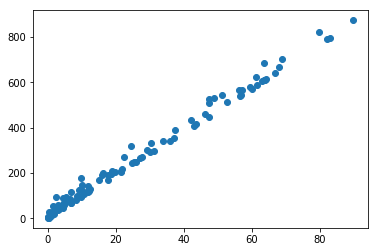

In [13]:
plt.scatter(x_list, y_list)
plt.show()

In [14]:
def train(x_list, gt_y_list, batch_size, lr, max_iter):
    w = 0
    b = 0
    num_samples = len(x_list)
    for i in range(max_iter):
        batch_idxs = np.random.choice(len(x_list), batch_size) #随机抽取batch_size个样本的索引值
        batch_x = [x_list[j] for j in batch_idxs]
        batch_y = [gt_y_list[j] for j in batch_idxs]
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        print('w:{0},b:{1}'.format(w,b))
        print('loss is {}'.format(eval_loss(w,b,x_list,gt_y_list)))
        time.sleep(1)
        
    return w,b

In [20]:
train(x_list, y_list, 100, 0.001, 100)

w:13.007935458734359,b:0.2683266482845424
loss is 6508.314069277691
w:9.079471384692326,b:0.1912241370584783
loss is 811.359886813217
w:10.506280451711573,b:0.2254910538498113
loss is 528.6099763714992
w:9.683429571052994,b:0.21678313213173395
loss is 363.98409349071795
w:10.03919954023786,b:0.23130834743650455
loss is 325.6450029264679
w:9.955209369062135,b:0.23739124216287694
loss is 319.5638439320296
w:9.838471646789731,b:0.24088841267289185
loss is 326.5497131392069
w:9.842821921898846,b:0.25137795369619187
loss is 325.84836198174116
w:9.924799142627982,b:0.26217475134143814
loss is 319.44176966251115
w:10.006970318194252,b:0.2726830487830056
loss is 321.9507664618781
w:9.992448411535554,b:0.28316081990109276
loss is 320.7686627238599
w:9.812000026828311,b:0.2920738974833695
loss is 330.0185452347705
w:9.982059501623828,b:0.3020115259981252
loss is 320.0039533279094
w:9.834512016826539,b:0.30913611564678356
loss is 326.3208164642242
w:9.811998862579223,b:0.3169916192709128
loss is 

(9.659664312166194, 1.0570939893551432)